# Week #3 Histogram and Spatial Filtering

In [15]:
!wget -nc 'https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe' -O kitty.jpg
!wget -nc 'https://drive.google.com/uc?id=1Z5tdeugKi8LyB2g-jJTwu3Y89Ljqj_SF' -O area.jpg
!wget -nc 'https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG' -O camaraman.tif
!wget -nc 'https://drive.google.com/uc?id=1J_SEj79YhWVcQrQKVEQkBDHroB-LxZgQ' -O moon.png
!wget -nc 'https://drive.google.com/uc?id=1eCyTF6u_w6bIDWrPONXJO5K0mo16DWwV' -O sudoku.jpg

File ‘kitty.jpg’ already there; not retrieving.
File ‘area.jpg’ already there; not retrieving.
File ‘camaraman.tif’ already there; not retrieving.
File ‘moon.png’ already there; not retrieving.
File ‘sudoku.jpg’ already there; not retrieving.


In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Exercise #1 Histogram
* grayscale
* rgb
* equalization

* Grayscale histogram

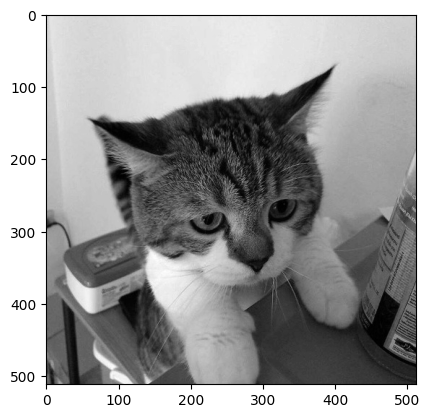

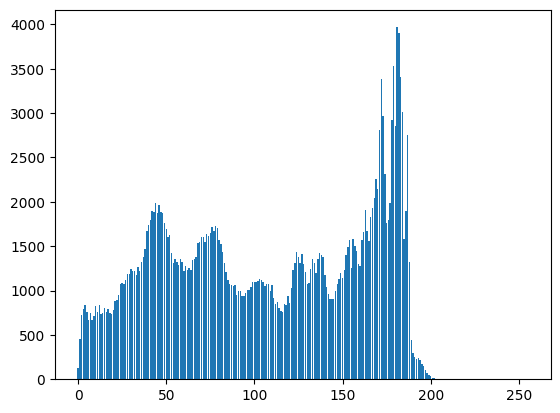

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("kitty.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.imshow(img_gray,cmap='gray');plt.show()
plt.bar(range(0,256),hist[:,0])
plt.show()

* RGB

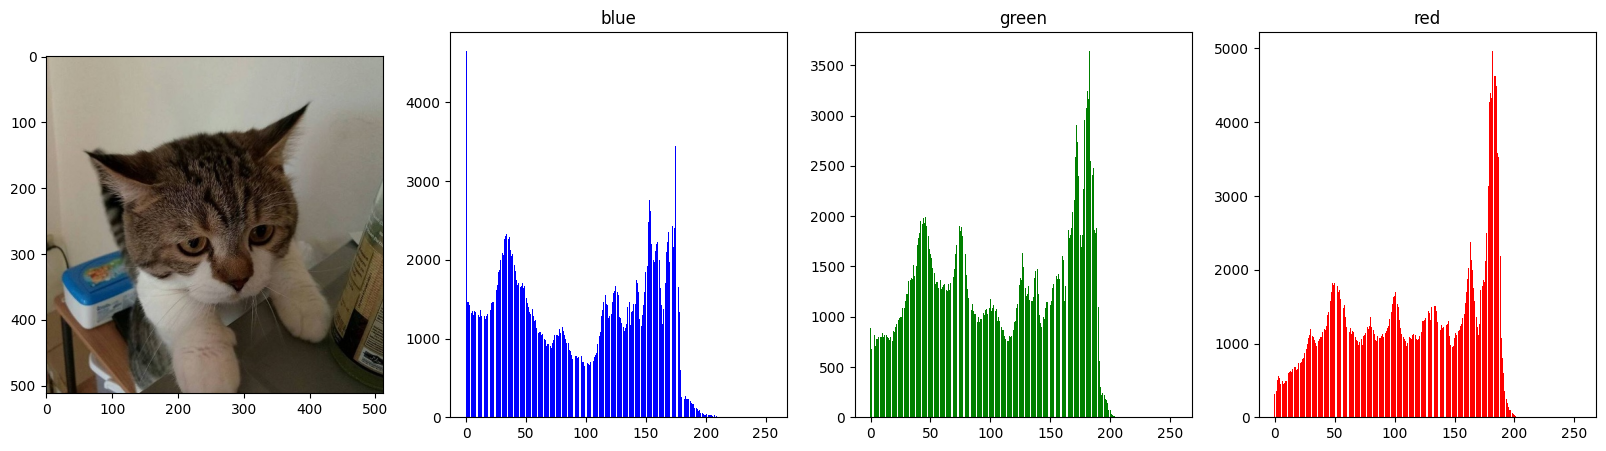

In [18]:
plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
plt.imshow(img[:,:,::-1])
chans = cv2.split(img)
colors = ("blue", "green", "red")
i = 1
for (chan, color) in zip(chans, colors):
  # create a histogram for the current channel and plot it
  i+=1
  plt.subplot(1,4,i)

  c_hist = cv2.calcHist([chan], [0], None, [256], [0,256])
  plt.title(color)
  plt.bar(range(0,256), c_hist[:, 0], color = color)

<BarContainer object of 256 artists>

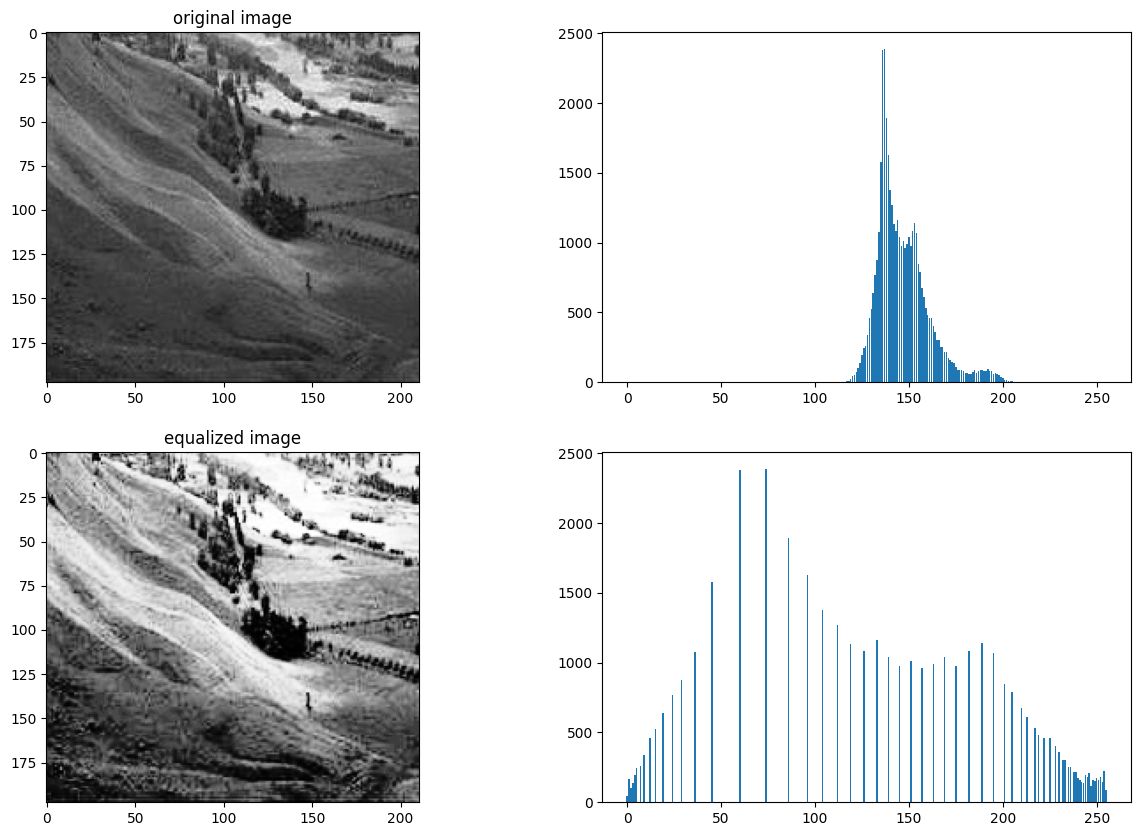

In [19]:
import cv2
img = cv2.imread("area.jpg")

plt.figure(figsize=(15, 10))

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# plot histogram of equalization + plot the histogram before and after equalized

plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(img_gray, cmap = 'gray')

plt.subplot(2,2,2)
o_hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])
plt.bar(range(0, 256), o_hist[:, 0])

img_equalized =  cv2.equalizeHist(img_gray)

plt.subplot(2,2,3)
plt.title('equalized image')
plt.imshow(img_equalized, cmap = 'gray')

plt.subplot(2,2,4)
o_hist = cv2.calcHist([img_equalized], [0], None, [256], [0,256])
plt.bar(range(0, 256), o_hist[:, 0])


## Exercise #2 Spatial Filtering
*  Filter2D

In [20]:
small_im = np.random.random((5,5))*100
small_im = small_im.astype(np.uint8)

print('small_im = ', small_im, end='\n\n')

kernel = np.ones((3,3),np.float32)/9
print('kernel = ', kernel, end='\n\n')

dst_im = cv2.filter2D(small_im,-1,kernel)
print('dst_im', dst_im, end='\n\n')

small_im =  [[77 91 54 44 55]
 [77 74 95 32 86]
 [ 0  7  4 58  2]
 [15 52  6 68 49]
 [ 5 59 93 39 50]]

kernel =  [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

dst_im [[79 79 66 64 49]
 [55 53 51 48 46]
 [40 37 44 44 50]
 [28 27 43 41 48]
 [40 34 49 48 55]]



* Averaging

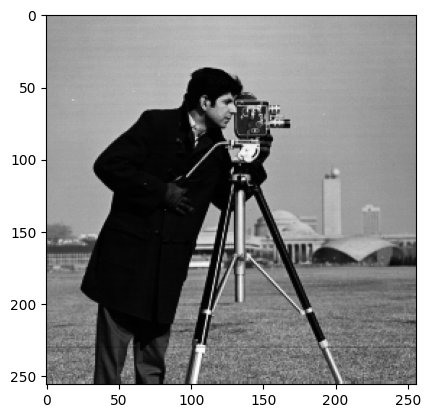

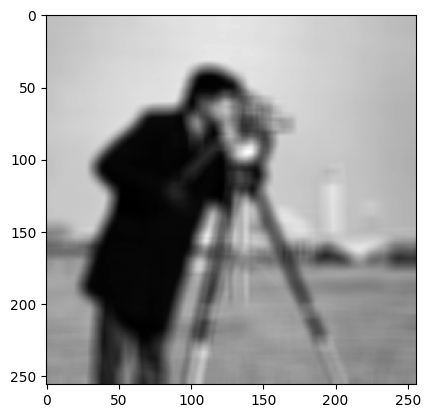

In [21]:
img = cv2.imread("camaraman.tif",0)

kernel = np.ones((11,11),np.float32)/(11*11)
dst_im = cv2.filter2D(img,-1,kernel)

plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(dst_im,cmap='gray')
plt.show()

* Laplacian Filtering

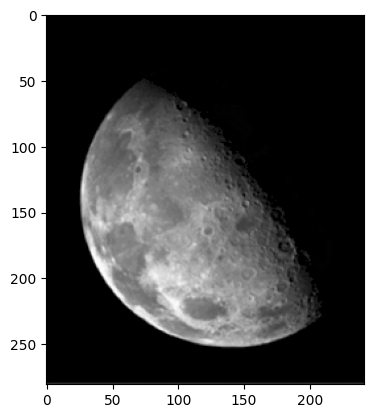

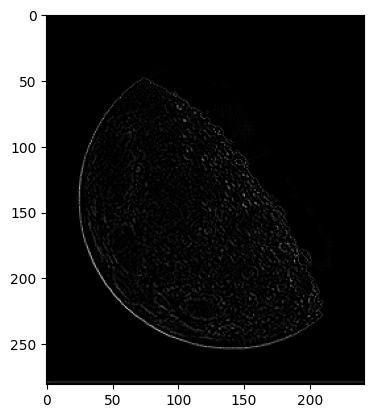

In [22]:
img_gray = cv2.imread("moon.png",0)

lap_filter = np.array([[0,1,0],
                       [1,-4,1],
                       [0,1,0]],np.int16)
dst_im = cv2.filter2D(img_gray,-1,lap_filter)

plt.imshow(img_gray,cmap='gray')
plt.show()
plt.imshow(dst_im,cmap='gray')
plt.show()

## Exercise #3 Enhancing the image
* Enhancing the moon using laplacian filter

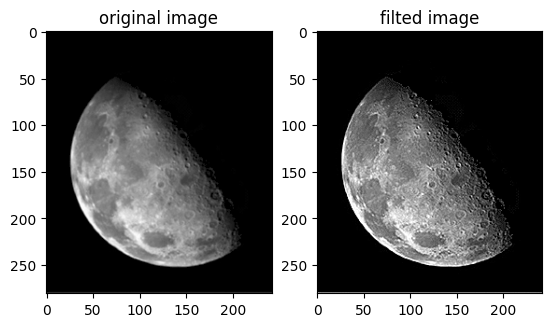

In [23]:
img_gray = cv2.imread("moon.png",0)

filter = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
], dtype=np.int16)

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img_gray, 
           cmap='gray')

filtered_img = cv2.filter2D(img_gray, -1, filter)
plt.subplot(1,2,2)
plt.title('filted image')
plt.imshow(filtered_img, 
           cmap='gray')